In [ ]:
# pip install tensorflow

In [ ]:
keras.backend.clear_session()

Loading of datasets**********
Train images shape: (700, 240, 240, 3)
Train labels shape: (700, 20)
Train images Type: <class 'numpy.ndarray'>
Train labels type: <class 'numpy.ndarray'>
Model modeling********************
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      73792     
__________________________________

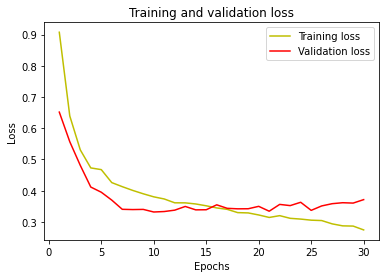

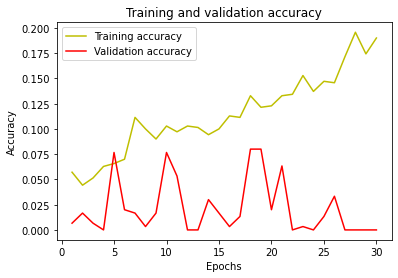

Predicting************
Predicted labels
[[0.01933786 0.00165204 0.03105593 ... 0.03411718 0.00589664 0.01384375]
 [0.04343161 0.00493383 0.03581375 ... 0.0917809  0.01218391 0.0280639 ]
 [0.01162948 0.0036055  0.03222249 ... 0.02053687 0.01036736 0.01042612]
 ...
 [0.02482107 0.00453267 0.04980377 ... 0.14268193 0.01578619 0.08852605]
 [0.02498405 0.00432985 0.03249712 ... 0.20357862 0.01093376 0.10258115]
 [0.01834555 0.00297315 0.0261306  ... 0.17552379 0.00633908 0.07275271]]

Original Labels
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import BatchNormalization

print('Loading of datasets**********')


input_image = np.load("/content/drive/MyDrive/DL_Project_files/image_data_new.npy",allow_pickle=True)

with open("/content/drive/MyDrive/DL_Project_files/final_labels.txt", "rb") as fp:   # Unpickling
    input_labels = pickle.load(fp)

input_image = input_image/255

input_labels = np.array(input_labels)




X_train, X_test, y_train, y_test = train_test_split(input_image, input_labels, random_state=20, test_size=0.3)


print('Train images shape:',X_train.shape)
print('Train labels shape:',y_train.shape)
print('Train images Type:',type(X_train))
print('Train labels type:',type(y_train))



print('Model modeling********************')
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print('Training model**************')
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)
print('Training End*******')

print('Plotting the graphs now***********')
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#################################################
print('Predicting************')
y_pred = model.predict(X_test)
print('Predicted labels')
print(y_pred)
print()
print('Original Labels')
print(y_test)
################################################################







